In [69]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from functools import partial
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.svm import OneClassSVM
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
col_names = ['Age','Workclass(Federal-gov)','Workclass(Local-gov)','Workclass(Private)','Workclass(Self-emp-inc)','Workclass(Self-emp-not-inc)'
             ,'Workclass(State-gov)','Workclass(Without-pay)','Fnlwgt','Education','MSRS(Divorced_Not-in-family)','MSRS(Divorced_Other-relative)'
             ,'MSRS(Divorced_Own-child)','MSRS(Divorced_Unmarried)','MSRS(Married-AF-spouse_Husband)','MSRS(Married-AF-spouse_Other-relative)'
             ,'MSRS(Married-AF-spouse_Own-child)','MSRS(Married-AF-spouse_Wife)','MSRS(Married-civ-spouse_Husband)','MSRS(Married-civ-spouse_Not-in-family)'
             ,'MSRS(Married-civ-spouse_Other-relative)','MSRS(Married-civ-spouse_Own-child)','MSRS(Married-civ-spouse_Wife)'
             ,'MSRS(Married-spouse-absent_Not-in-family)','MSRS(Married-spouse-absent_Other-relative)','MSRS(Married-spouse-absent_Own-child)'
             ,'MSRS(Married-spouse-absent_Unmarried)','MSRS(Never-married_Not-in-family)','MSRS(Never-married_Other-relative)'
             ,'MSRS(Never-married_Own-child)','MSRS(Never-married_Unmarried)','MSRS(Separated_Not-in-family)','MSRS(Separated_Other-relative)'
             ,'MSRS(Separated_Own-child),MSRS(Separated_Unmarried)','MSRS(Widowed_Not-in-family)','MSRS(Widowed_Other-relative)','MSRS(Widowed_Own-child)'
             ,'MSRS(Widowed_Unmarried)','Occupation(Adm-clerical)','Occupation(Armed-Forces)','Occupation(Craft-repair)','Occupation(Exec-managerial)','Occupation(Farming-fishing)'
             ,'Occupation(Handlers-cleaners)','Occupation(Machine-op-inspct)','Occupation(Other-service)','Occupation(Priv-house-serv)','Occupation(Prof-specialty)'
             ,'Occupation(Protective-serv)','Occupation(Sales)','Occupation(Tech-support)','Occupation(Transport-moving)','Race(Amer-Indian-Eskimo)','Race(Asian-Pac-Islander)'
             ,'Race(Black)','Race(Other)','Race(White)','Sex','Gain','Loss','Country(Cambodia)','Country(Canada)','Country(China)','Country(Columbia)'
             ,'Country(Cuba)','Country(Dominican-Republic)','Country(Ecuador)','Country(El-Salvador)','Country(England)','Country(France)'
             ,'Country(Germany)','Country(Greece)','Country(Guatemala)','Country(Haiti)','Country(Holand-Netherlands)','Country(Honduras)'
             ,'Country(Hong)','Country(Hungary)','Country(India)','Country(Iran)','Country(Ireland)','Country(Italy)','Country(Jamaica)'
             ,'Country(Japan)','Country(Laos)','Country(Mexico)','Country(Nicaragua)','Country(Outlying-US(Guam-USVI-etc))','Country(Peru),Country(Philippines)'
             ,'Country(Poland)','Country(Portugal)','Country(Puerto-Rico)','Country(Scotland)','Country(South)','Country(Taiwan)'
             ,'Country(Thailand)','Country(Trinadad&amp;Tobago)','Country(United-States)','Country(Vietnam)','Country(Yugoslavia)','Over50K','Y']
# load datasetSex
data = pd.read_csv("adult _data(N)_v1.csv", header=None, names=col_names)

In [13]:
data.head()

,,Age,Workclass(Federal-gov),Workclass(Local-gov),Workclass(Private),Workclass(Self-emp-inc),Workclass(Self-emp-not-inc),Workclass(State-gov),Workclass(Without-pay),Fnlwgt,Education,...,Country(Scotland),Country(South),Country(Taiwan),Country(Thailand),Country(Trinadad&amp;Tobago),Country(United-States),Country(Vietnam),Country(Yugoslavia),Over50K,Y
0.301370,0,0,0,0,0,1,0,0.043338,0.800000,0,0,...,0,0,0,0,0,1,0,0,0,40
0.452055,0,0,0,0,1,0,0,0.047277,0.800000,0,0,...,0,0,0,0,0,1,0,0,0,13
0.287671,0,0,1,0,0,0,0,0.137244,0.533333,1,0,...,0,0,0,0,0,1,0,0,0,40
0.493151,0,0,1,0,0,0,0,0.150212,0.400000,0,0,...,0,0,0,0,0,1,0,0,0,40
0.150685,0,0,1,0,0,0,0,0.220703,0.800000,0,0,...,0,0,0,0,0,0,0,0,0,40


In [14]:
from tkinter import Y
feature_cols = ['Age','Workclass(Federal-gov)','Workclass(Local-gov)','Workclass(Private)','Workclass(Self-emp-inc)','Workclass(Self-emp-not-inc)'
             ,'Workclass(State-gov)','Workclass(Without-pay)','Fnlwgt','Education','MSRS(Divorced_Not-in-family)','MSRS(Divorced_Other-relative)'
             ,'MSRS(Divorced_Own-child)','MSRS(Divorced_Unmarried)','MSRS(Married-AF-spouse_Husband)','MSRS(Married-AF-spouse_Other-relative)'
             ,'MSRS(Married-AF-spouse_Own-child)','MSRS(Married-AF-spouse_Wife)','MSRS(Married-civ-spouse_Husband)','MSRS(Married-civ-spouse_Not-in-family)'
             ,'MSRS(Married-civ-spouse_Other-relative)','MSRS(Married-civ-spouse_Own-child)','MSRS(Married-civ-spouse_Wife)'
             ,'MSRS(Married-spouse-absent_Not-in-family)','MSRS(Married-spouse-absent_Other-relative)','MSRS(Married-spouse-absent_Own-child)'
             ,'MSRS(Married-spouse-absent_Unmarried)','MSRS(Never-married_Not-in-family)','MSRS(Never-married_Other-relative)'
             ,'MSRS(Never-married_Own-child)','MSRS(Never-married_Unmarried)','MSRS(Separated_Not-in-family)','MSRS(Separated_Other-relative)'
             ,'MSRS(Separated_Own-child),MSRS(Separated_Unmarried)','MSRS(Widowed_Not-in-family)','MSRS(Widowed_Other-relative)','MSRS(Widowed_Own-child)'
             ,'MSRS(Widowed_Unmarried)','Occupation(Adm-clerical)','Occupation(Armed-Forces)','Occupation(Craft-repair)','Occupation(Exec-managerial)','Occupation(Farming-fishing)'
             ,'Occupation(Handlers-cleaners)','Occupation(Machine-op-inspct)','Occupation(Other-service)','Occupation(Priv-house-serv)','Occupation(Prof-specialty)'
             ,'Occupation(Protective-serv)','Occupation(Sales)','Occupation(Tech-support)','Occupation(Transport-moving)','Race(Amer-Indian-Eskimo)','Race(Asian-Pac-Islander)'
             ,'Race(Black)','Race(Other)','Race(White)','Sex','Gain','Loss','Country(Cambodia)','Country(Canada)','Country(China)','Country(Columbia)'
             ,'Country(Cuba)','Country(Dominican-Republic)','Country(Ecuador)','Country(El-Salvador)','Country(England)','Country(France)'
             ,'Country(Germany)','Country(Greece)','Country(Guatemala)','Country(Haiti)','Country(Holand-Netherlands)','Country(Honduras)'
             ,'Country(Hong)','Country(Hungary)','Country(India)','Country(Iran)','Country(Ireland)','Country(Italy)','Country(Jamaica)'
             ,'Country(Japan)','Country(Laos)','Country(Mexico)','Country(Nicaragua)','Country(Outlying-US(Guam-USVI-etc))','Country(Peru),Country(Philippines)'
             ,'Country(Poland)','Country(Portugal)','Country(Puerto-Rico)','Country(Scotland)','Country(South)','Country(Taiwan)'
             ,'Country(Thailand)','Country(Trinadad&amp;Tobago)','Country(United-States)','Country(Vietnam)','Country(Yugoslavia)','Over50K']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0.301370  0    40
0.452055  0    13
0.287671  0    40
0.493151  0    40
0.150685  0    40
               ..
0.136986  0    38
0.315068  0    40
0.561644  0    40
0.068493  0    20
0.479452  0    40
Name: Y, Length: 30162, dtype: int64

In [15]:
data2 = preprocessing.normalize(data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(data)
data3 = scaler.transform(data)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
X_train.shape

(22621, 101)

In [5]:
#training
trainingPath=r'adult _data(N)_v1.csv'
trainingData=[]
import csv
with open(trainingPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     trainingData.append(r)
Xtraining=[]
ytraining=[]
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(trainingData)):
    #Row Data
    rowData=[]
    for c in range(0,len(trainingData[r])):
        rowData.append(trainingData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
X_train=[]
y_train=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X_train.append(rowData)
    y_train.append(float(pureData[r][len(pureData[r])-1]))
#test
testPath=r'adult _test(N)_v1.csv'
testData=[]
import csv
with open(testPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     testData.append(r)
#Pure Data
pureData=[]
for r in range(0,len(testData)):
    #Row Data
    rowData=[]
    for c in range(0,len(testData[r])):
        rowData.append(testData[r][c])
    if(r!=0):
        pureData.append(rowData)
X_test=[]
y_test=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X_test.append(rowData)
    y_test.append(float(pureData[r][len(pureData[r])-1]))

In [6]:
clf=svm.SVR(C=4, kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
y_pred

array([43.01731023, 40.11268221, 39.87337044, ..., 39.61082145,
       36.89662996, 49.11555473])

In [7]:
print(clf.score(X_train,y_train))

0.11608133888546046


In [20]:
clf = svm.SVC(kernel='rbf', C=1e3, gamma='auto')
clf.fit(X_train, y_train)
y_pred_svr=clf.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_svr))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_svr,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_svr))

In [14]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
regr.fit(X_train, y_train)
y_pred_lsvr = regr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_lsvr))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_lsvr,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_lsvr))

MAE: 7.079001256018317
RMSE : 11.34
MAPE: 0.2816055718637478


c:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
# 建立 kernel='linear' 模型
linearModel=svm.SVR(C=2, kernel='linear')
# 使用訓練資料訓練模型
linearModel.fit(X, y)
# 使用訓練資料預測分類
predicted=linearModel.predict(X_test)
regr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))

MAE: 7.079001256018317
RMSE : 11.34
MAPE: 0.2816055718637478


c:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
# 建立 kernel='poly' 模型
polyModel=svm.SVR(C=6, kernel='poly', degree=3, gamma='auto')
# 使用訓練資料訓練模型
polyModel.fit(X, y)
# 使用訓練資料預測分類
predicted=polyModel.predict(X_test)
y_pred_lsvr = regr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_svr))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_svr,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_svr))

MAE: 7.115369314414534
RMSE : 11.97
MAPE: 0.282296442215949


score_array [0.09583033094914939, 0.09606575139072604, 0.09622246600811324, 0.09625845413104128, 0.09629144405303225, 0.09633347945599169, 0.09637252283209152, 0.09639264669214709, 0.09640516555803846, 0.09641226349286525, 0.09642773654509751, 0.09643793428354497, 0.09643826400355271, 0.096459368175843, 0.09647384046244523, 0.09647469829833533, 0.09648669743875593, 0.09649350099240805, 0.0964976842247649]
 
score_array_MAX: 0.0964976842247649
----------------------------------------------------------------------------------------------------------
score_array_test [0.09961142518586485, 0.09986987315902718, 0.10008578453567962, 0.10020980567582682, 0.10031366076291337, 0.10039623379389162, 0.10047621290187947, 0.10050556476308603, 0.10050509798994667, 0.10049860944661726, 0.10050275985557988, 0.10050184640837445, 0.10049122942083133, 0.1005026992378445, 0.1005080591045433, 0.10049989379361879, 0.10050402373121714, 0.10050348978374124, 0.10050063320743707]
 
score_array_test_MAX: 0.10050

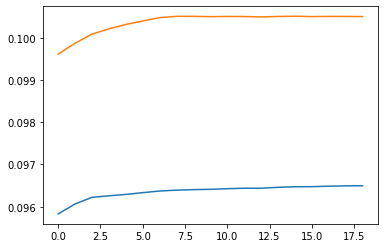

In [17]:
score_array= []
score_array_test= []
for i in range(1,20):   
    y_pred_svr = svm.SVR(kernel='linear',C=i)
    y_pred_svr.fit(X_train, y_train)
    score_val = y_pred_svr.score(X_train, y_train)
    score_test = y_pred_svr.score(X_test, y_test)
    score_array.append(score_val)
    score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.plot(score_array)
plt.plot(score_array_test)